In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
def read_data():
    train_data = pd.read_csv("/home/jonathan/tesis/5to_avance/Ejemplos/titanic/train.csv")
    print("Train data imported successfully!!")
    print("-"*50)
    test_data = pd.read_csv("/home/jonathan/tesis/5to_avance/Ejemplos/titanic/test.csv")
    print("Test data imported successfully!!")
    return train_data , test_data

train_data , test_data = read_data()
combine = [train_data , test_data]

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


In [3]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Descubrimos las caracteristicas de los datos

In [5]:
print("Train data features are:\n")
print(train_data.columns.values)
print('\n' ,"="*80 , '\n')
print("Test data features are:\n")
print(test_data.columns.values)

Train data features are:

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Test data features are:

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
train_data.info()
print('_'*40 , '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

# Descubrimos los valores faltantes 

In [7]:
print("Train data missed values:\n")
print(train_data.isnull().sum())
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Encontramos las caracteristicas númericas 
### La tasa de supervivencia es del 38.38%
### Más del 75% de pasajeros tienen menos de 38 años 
### La mayoria de pasajeros viajan solos

## Hay demasiados datos atípicos en las columnas Fare, Age, SibSp y Parch. Esto nos inspira a usar el paso de EDA(Exploratory Data Analysis)

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Caracteristicas de los datos categoricos
### No hay nombres duplicados 
### Se infiere que el 64.7% de los pasajeros son hombres  (577/891)
### Existen valores duplicados en la columna de ticket (23.5% son duplicados)
### Hay datos duplicados en la columna de Cabin (27.9% son duplicados)
### El 72.4% de los pasajeros embarcan en "S

## Conclusiones: 
### Debido a que los nombres son unicos nos permiten la aplicación de ingenieria de datos.
### Los datos duplicados en las columnas Ticket y Cabin nos brindan información para tomar la mejor decisión al completar los datos faltantes
### Completaremos los valores faltantes en la columna "Embarked" con la letra "S"



In [9]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Exploratory Data Analysis (EDA)

## Conteo de sobrevivientes

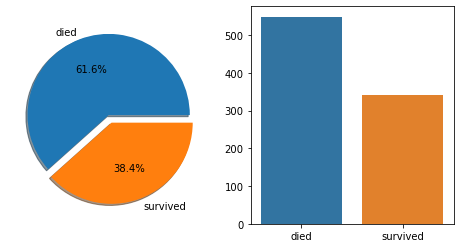

In [10]:
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

## Descubriendo las caracteristicas de correlación con la variable survived

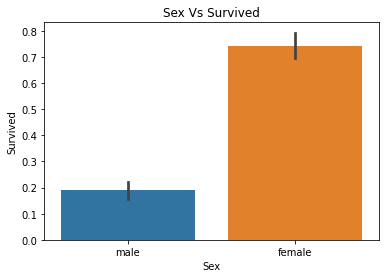

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature):
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()
    
survived_bar_plot('Sex')
survived_table("Sex")

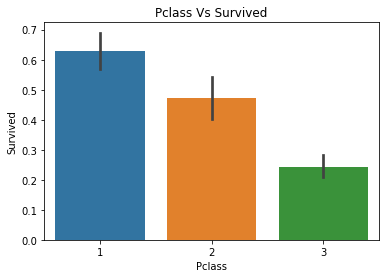

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
survived_bar_plot("Pclass")
survived_table("Pclass")

### Más probabilidades de sobrevivir aquellas personas que embarcaron en "C"

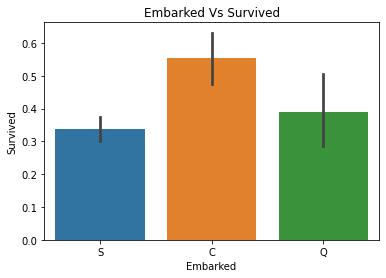

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [13]:
survived_bar_plot("Embarked")
survived_table("Embarked")

### La variable Parch tiene cero correlación para algunos valores

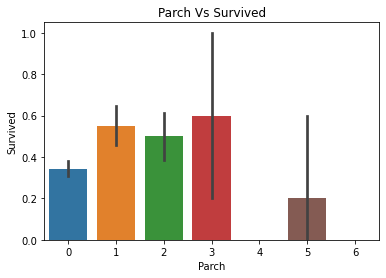

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
survived_bar_plot("Parch")
survived_table("Parch")

### En la variable "SibSp" para algunos valores no se encuentra correlación

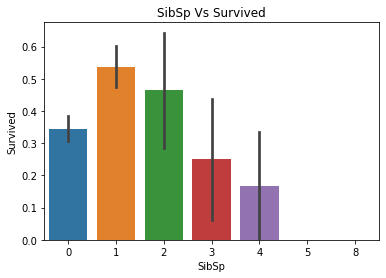

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
survived_bar_plot("SibSp")
survived_table("SibSp")

### Los niños menores de 5 años y los niños entre 10 y 15 años tienen más probabilidades de sobrevivir
### Los pasajeros mayores a 75 años sobrevivieron
### Hay una mayoria de pasajeros entre 15 y 40 años de edad 

### Conclusiones: Es buena práctica convertir las características de edad en intervalos de longitud 5 

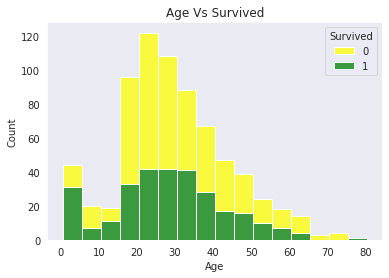

In [16]:
sns.set_style("dark") # to remove the grid.
survived_hist_plot("Age") # Note: This plot is stack plot.

# Descubrimos la correlación de las diferentes variables
### PassengerID no tiene correlación con ninguna variable
### Clase tiene una fuerte correlación negativa con "Age" and "Fare"
### "Age" tiene una correlación negativa con "parch" y "sibsp"

<AxesSubplot:>

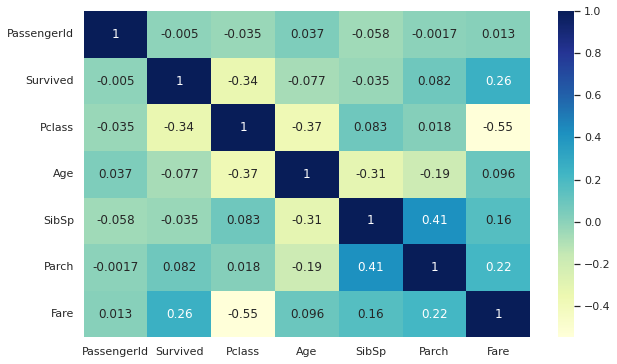

In [17]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

## Correlación entre Pclass-Age-Survived
### La clase 3 tiene mayor cantidad de pasajeros y la mayoría no sobrevivieron 
### Los pasajeros bebes en clase 2 y 3 la mayoria sobrevivieron 
### La mayoría de pasajeros en la clase 1 sobrevivieron 

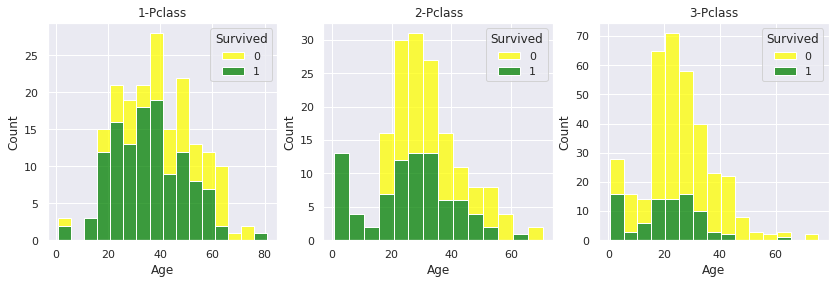

In [18]:
plot , ax = plt.subplots(1 , 3 , figsize=(14,4))
sns.histplot(data = train_data.loc[train_data["Pclass"]==1] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("1-Pclass")
sns.histplot(data = train_data.loc[train_data["Pclass"]==2] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("2-Pclass")
sns.histplot(data = train_data.loc[train_data["Pclass"]==3] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[2],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("3-Pclass")
plt.show()

## Correlación entre Sex-Age-Survived
### Los pasajeros mayores de 70 años son hombres

Text(0.5, 1.0, 'Females')

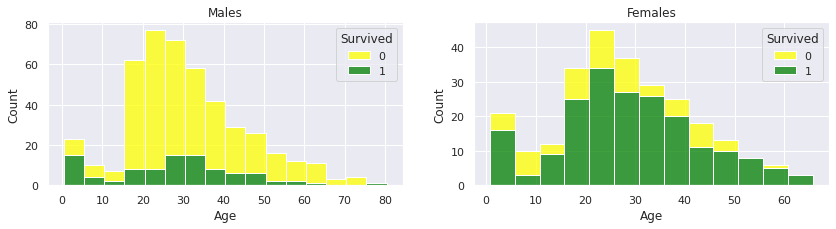

In [19]:
plot , ax = plt.subplots(1 , 2 , figsize=(14,3))
sns.histplot(data = train_data.loc[train_data["Sex"]=="male"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[0],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Males")
sns.histplot(data = train_data.loc[train_data["Sex"]=="female"] , x = "Age" , hue = "Survived",binwidth=5,ax = ax[1],palette = sns.color_palette(["yellow" , "green"]),multiple = "stack").set_title("Females")

# Wrangling The Data (Manipulación de Datos)

## Descartar datos


In [20]:
train_data.drop(columns = ["PassengerId"] , inplace = True)

for dataset in combine:
    dataset.drop(columns = ["Ticket" , "Cabin"] , inplace = True)
    
print("Dropping features Done !!")

Dropping features Done !!


## Convirtiendo las variables categoricas a numericas y completando valores vacios

### Variable Embarked pasamos a datos numericos 0,1 y 2

In [21]:
train_data.Embarked.fillna(train_data.Embarked.dropna().max(), inplace=True)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

### Variable Sex pasamos a datos numericos 0 y 1

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

## Completamos valores faltantes de edad (Con el promedio) y convertimos los datos de edad a enteros aproximandolo a la edad 0.5 más cercana

In [23]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

## Completamos datos faltantes de la columna "fare"

In [24]:
test_data.Fare.fillna(test_data.Fare.dropna().median() , inplace= True)

# Veriicamos nuevamente datos altantes

In [25]:
print(train_data.isnull().sum())
print("-" * 50)
print(test_data.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------------------------------------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [26]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,0


# Modiicamos los datos de edad en intervalos 

In [27]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


## Modiiamos la tabla de entrenamiento por intervalos de edad 

In [28]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,0,"(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,1,"(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,0,"(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,0,"(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,0,"(32.0, 48.0]"


## Quitamos la columa "Ageband"

In [29]:
train_data.drop(['AgeBand'], axis=1 , inplace = True)

## Modiicamos los datos de tari en invertalos

In [30]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=False)

,FareBand,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


# Modiicamos tabla de entrenamiento por intervalos 

In [31]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data.drop(['FareBand'], axis=1 , inplace = True)

In [32]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1
2,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,3,0
4,0,3,"Allen, Mr. William Henry",0,2,0,0,1,0


# IINGENIERIA DE DATOS

## Agregamos una nueva columna con el tamaño de la amilia

In [33]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)
test_data.drop(['Parch', 'SibSp'], axis=1 , inplace = True)    

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [34]:
for dataset in combine:
    dataset['Single'] = dataset['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
    
train_data.drop(columns = ["FamilySize"] , inplace = True)
test_data.drop(columns = ["FamilySize"] , inplace = True)

# Se extrae el titulo de cada persona de acuerdo al titulo del nombre

In [35]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


## Se modiica el titulo del nombre 

In [36]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Cambiamos titulo a datos numéricos en la tabla

In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Quitamos las columnas nombre de la tabla de entrenamiento y de prueba

In [38]:
train_data.drop(['Name'], axis=1 , inplace = True)
test_data.drop(['Name'], axis=1 , inplace = True)  

# Veriicamos como quedaron nuestras tablas inales de entrenamiento y prueba

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,0,3,0,1,0,0,0,1,0,0,Mr
1,1,1,1,2,3,1,0,1,0,0,Mrs
2,1,3,1,1,1,0,1,0,0,0,Miss
3,1,1,1,2,3,0,0,1,0,0,Mrs
4,0,3,0,2,1,0,1,0,0,0,Mr


In [40]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Single,SmallF,MedF,LargeF,Title
0,892,3,0,2,0,2,1,0,0,0,Mr
1,893,3,1,2,0,0,0,1,0,0,Mrs
2,894,2,0,3,1,2,1,0,0,0,Mr
3,895,3,0,1,1,0,1,0,0,0,Mr
4,896,3,1,1,1,0,0,0,1,0,Mrs


# MODELADO

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Preparando los datos para el entrenamiento

In [42]:
Y_train = train_data["Survived"]
X_train = train_data.drop(labels = ["Survived"],axis = 1)
Test = test_data.drop(labels = ["PassengerId"],axis = 1)
print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

X_train shape is = (891, 10)
Y_train shape is = (891,)
Test shape is = (418, 10)


## Hacemos validación cruada para evaluar distintos modelos ML
### Cross validate model with Kfold stratified cross val

In [43]:
kfold = StratifiedKFold(n_splits=10)

## Prueba de los distintos algoritmos

/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 871, in check_X

/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 443, in fit
    return super().fit(X, y, sample_weight)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 130, in fit
    sample_weight, estimator_weight, estimator_error = self._boost(
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 503, in _boost
    return self._boost_real(iboost, X, y, sample_weight, random_state)
  File "/home/jonatha

/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 364, in _fit
    X, y = self._validate_input(X, y, incremental, reset=first_pass)
  File "/home/jonathan/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 971, in _validate_input
    X, y = self._validate_data(X, y, accept

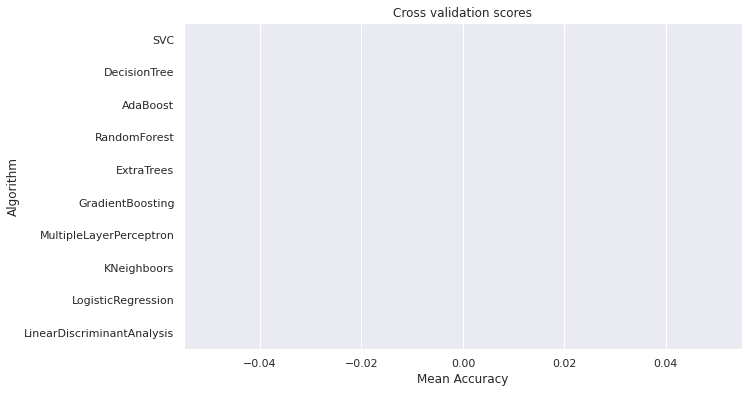

In [44]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
